In [1]:
#imports

import numpy as np
import pandas as pd
import scipy as sp
from math import sqrt
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb

#models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model algorithms
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split as tts
from sklearn.cross_validation import train_test_split as tts_cv

C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#data
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [4]:
#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [5]:
#dependent variable
depVar = rawData['PAY_AMT6']

In [6]:
x_train, x_test, y_train, y_test = tts(features, depVar, test_size=0.25, random_state=257)

In [7]:
x_train, x_test, y_train, y_test = tts_cv(x_train, y_train)
x_train.shape, x_test.shape

((16875, 11), (5625, 11))

In [8]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [9]:
#SVR
modelSVR.fit(x_train,y_train)
print(cross_val_score(modelSVR, x_train, y_train))
modelSVR.score(x_train,y_train)

[-0.04400038 -0.04715017 -0.04364661]


-0.044425845356383054

In [10]:
#RandomForest
modelRF.fit(x_train,y_train)
print(cross_val_score(modelRF, x_train, y_train))
modelRF.score(x_train,y_train)

[-0.00960692 -0.00189425  0.08365292]


0.8182037770351265

In [11]:
#LinearRegression
modelLR.fit(x_train,y_train)
print(cross_val_score(modelLR, x_train, y_train))
modelLR.score(x_train,y_train)

[0.17073895 0.05342271 0.11820446]


0.132355825756153

In [17]:
predictions = modelRF.predict(x_test)
predRsquared = r2_score(y_test, predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.043
RMSE: 19783.748


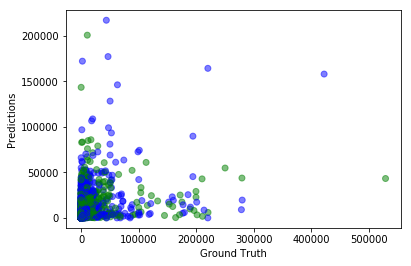

In [18]:
plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();